In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
import pandas as pd
import os
import umap

In [12]:
files=glob.glob("./Stocks/*.txt")
print(np.shape(files))
print(files[:20])

(7194,)
['./Stocks/ardc.us.txt', './Stocks/epix.us.txt', './Stocks/eab.us.txt', './Stocks/batra.us.txt', './Stocks/inbk.us.txt', './Stocks/bgx.us.txt', './Stocks/strt.us.txt', './Stocks/manh.us.txt', './Stocks/atus.us.txt', './Stocks/icbk.us.txt', './Stocks/ftnt.us.txt', './Stocks/nhld.us.txt', './Stocks/dfs.us.txt', './Stocks/scvl.us.txt', './Stocks/ing.us.txt', './Stocks/hope.us.txt', './Stocks/jpt.us.txt', './Stocks/ocfc.us.txt', './Stocks/gsk.us.txt', './Stocks/apog.us.txt']


In [14]:
# Analizo todas los  x="high" y="nombre del archivo". Ejm

In [16]:
data = pd.read_csv("{}".format(files[0]),delimiter=",")
labels=data.keys()
print(labels)
print(np.shape(data))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
(1249, 7)


In [17]:
n_max=1200#number of files taken
n_data=50# last days taken
#n_max=len(files)
X=[]
cnt=0
for f in files[:n_max]:
    if(os.stat("{}".format(f)).st_size != 0):
        data = pd.read_csv("{}".format(f),delimiter=",")
        label=data.keys()
        if(len(data[label[0]])>49):
            X=np.append(X,data[label[2]][-n_data:])#toma todos los datos con high
            cnt+=1
#        Y=np.append(Y,data[label[4]][-n_data:])#toma todos los datos con high
X=X.reshape(cnt,n_data)
Y=np.arange(cnt)
#Y=Y.reshape(n_max,n_data)
#print(20*3201)
print(np.shape(X))
print(np.shape(Y))

(1137, 50)
(1137,)


In [43]:
embedding_best=np.zeros((1137,2,4))

/home/john/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 202 separate connected components using meta-embedding (experimental)
  n_components
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/john/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 202 separate connected components using meta-embedding (experimental)
  n_components
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/john/anaconda3/lib/python3.7/site-packages/umap/spectral.py:182: UserWarning: WARNING: spectral initialisation faile

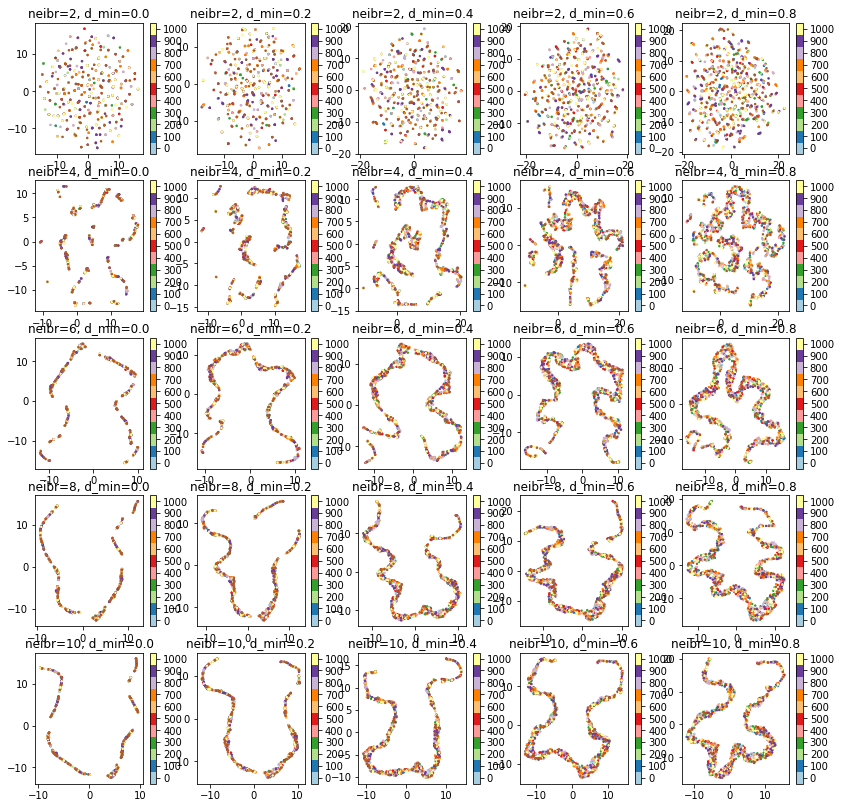

In [48]:
cnt_2=0
plt.figure(1,figsize = (14,14))
for i in range(2,12,2):
    for j in np.arange(0,1,0.2):
        reducer = umap.UMAP(n_neighbors=i, min_dist=j, metric='euclidean')#, n_components=2)
        reducer.fit(X)
        embedding = reducer.transform(X)
        np.shape(embedding)   
        if (2<=i<=8 and j==0.2):
            embedding_best[:,:,int(i/2)-1]=embedding
        np.shape(embedding)
        cnt_2+=1
        plt.subplot(5,5,cnt_2)
        plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=2.0)
        #plt.colorbar(boundaries=Y-0.5).set_ticks(np.arange(0,cnt,50))#(Y)
        plt.colorbar(boundaries=np.arange(0,cnt,100)-50).set_ticks(np.arange(0,cnt,100))
        plt.title("neibr={}, d_min={:.1f}".format(i,j))
plt.savefig("umap.png")

# Clustering sobre neibr={2,4,6,8}, d_min=0.2

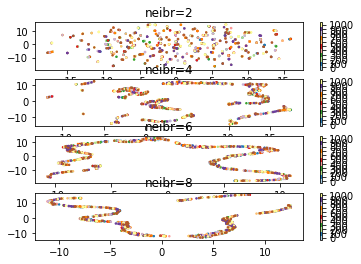

In [56]:
#se tomaron estas gráficas:
a=embedding_best
for i in range(4):
    plt.subplot(4,1,i+1)
    plt.scatter(a[:,0,i], a[:,1,i], c=Y, cmap='Paired', s=2.0)
        #plt.colorbar(boundaries=Y-0.5).set_ticks(np.arange(0,cnt,50))#(Y)
    plt.colorbar(boundaries=np.arange(0,cnt,100)-50).set_ticks(np.arange(0,cnt,100))
    plt.title("neibr={}".format(2*i+2))

In [52]:
print(np.shape(embedding_best))
print(1137*2*4)

(1137, 2, 4)
9096


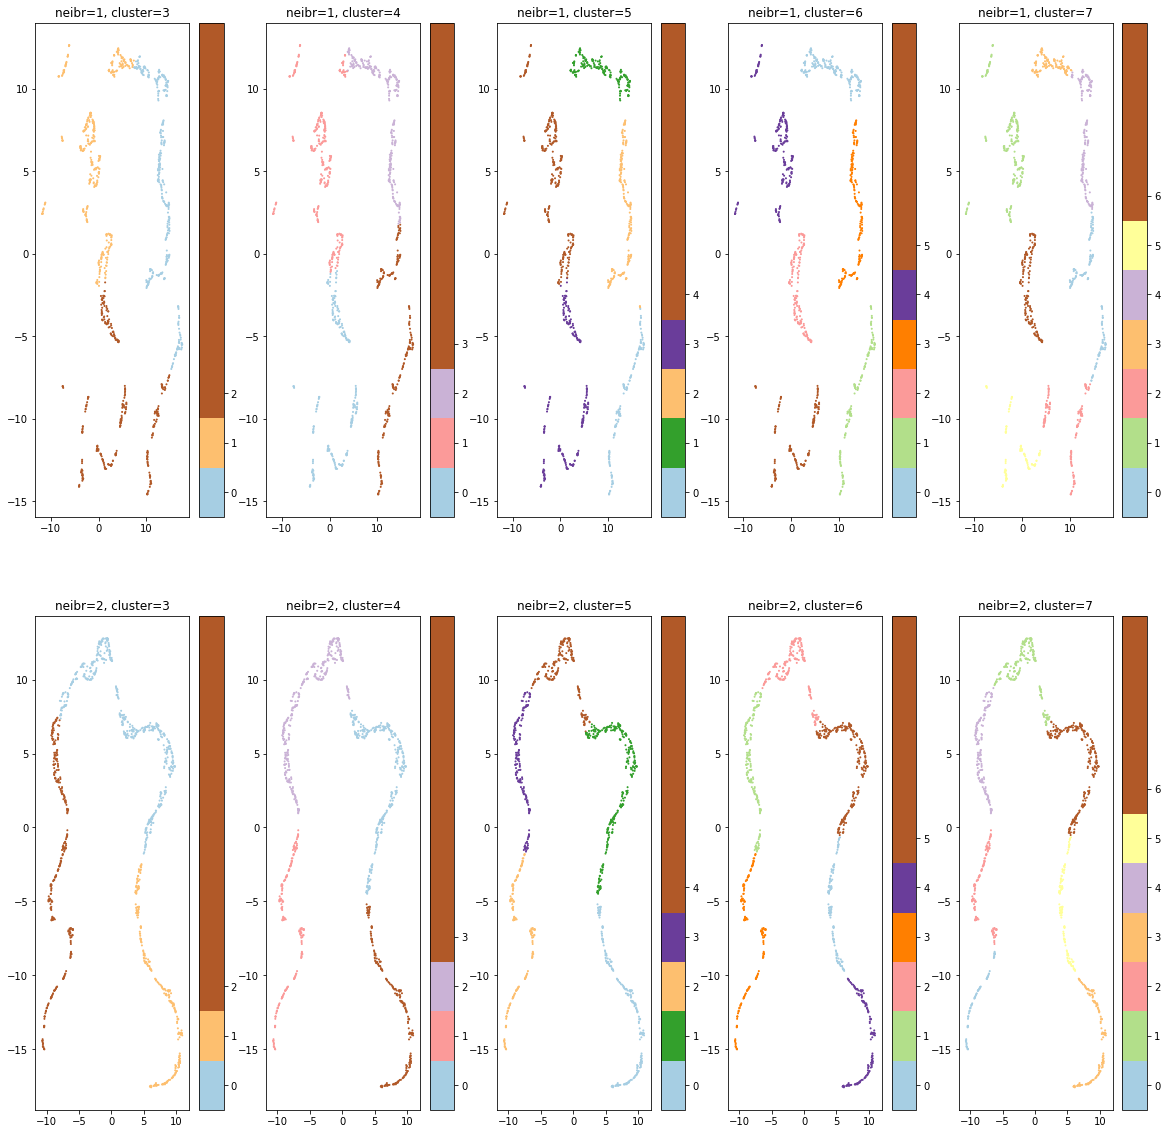

In [70]:
#n_clusters = 10
#Esto se hace para perplexity=10
cnt_2=0
plt.figure(3,figsize = (20,20))
for i in range(1,3):
    for n_clusters in range(3,8):
        k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
        k_means.fit(embedding_best[:,:,i]) # training
        cluster = k_means.predict(embedding_best[:,:,i]) # predice a cual cluster corresponde cada elmento
        distance = k_means.transform(embedding_best[:,:,i]) # calcula la distancia de cada elemento al centro de su cluster
        cnt_2+=1
        plt.subplot(2,5,cnt_2)
        plt.scatter(embedding_best[:,0,i], embedding_best[:,1,i], c=cluster, cmap='Paired', s=1.0)
        plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(n_clusters))
        plt.title("neibr={}, cluster={:}".format(i,n_clusters))
plt.savefig("clusters.png")

# Discusión

Al aplicar umap se observa el agrupamiento de los elementos en un conjunto de líneas, en las cuales cada número está relacionado con el nombre de un mercado de la siguiente forma:

In [50]:
print("Mercado"," ","Número")
for i,f in enumerate(files[:n_max]):
    if(os.stat("{}".format(f)).st_size != 0):
        print(f[9:-4]," ",i)
 

Mercado   Número
ardc.us   0
epix.us   1
eab.us   2
batra.us   3
inbk.us   4
bgx.us   5
strt.us   6
manh.us   7
atus.us   8
icbk.us   9
ftnt.us   10
nhld.us   11
dfs.us   12
scvl.us   13
ing.us   14
hope.us   15
jpt.us   16
ocfc.us   17
gsk.us   18
apog.us   19
mlvf.us   20
ktn.us   21
stot.us   22
rcky.us   23
ldl.us   24
dlx.us   25
rtix.us   26
sb.us   27
hyb.us   28
ckh.us   29
gne.us   30
scacw.us   31
spb.us   32
eye.us   33
oilu.us   34
iii.us   35
fomx.us   36
yume.us   37
tpre.us   38
fran.us   39
krma.us   40
ale.us   41
bxp_b.us   42
mlp.us   43
amed.us   44
pmbc.us   45
ship.us   46
ergf.us   47
sonc.us   48
cw.us   49
ubs.us   50
orrf.us   51
race.us   52
evgbc.us   53
hsea.us   54
dcf.us   55
nfbk.us   56
agfs.us   57
clvs.us   58
uri.us   59
mkl.us   60
mnr.us   61
swin.us   62
lvus.us   63
sep.us   64
tpz.us   65
irdm.us   66
bracr.us   67
blph.us   68
spab.us   69
fixd.us   70
brg_d.us   71
bml_l.us   72
iret_b-cl.us   73
dl.us   74
ssi.us   75
kai.us   76
cveo.us   77

lmhb.us   788
flqs.us   789
wmlp.us   790
ddf.us   791
aqua.us   792
tig.us   793
gol.us   794
skm.us   795
jmt.us   796
eyeg.us   797
emci.us   798
inva.us   799
slm.us   800
cat.us   801
bkep.us   802
cwbc.us   803
dni.us   804
eeq.us   805
hhs.us   806
gasx.us   807
itic.us   808
intu.us   809
lw.us   810
coke.us   811
tpgh.us   812
fpei.us   813
lxp.us   814
nrp.us   815
spgi.us   816
psb_u.us   817
fcnca.us   818
vmc.us   819
arl.us   820
tzoo.us   821
heb.us   822
acst.us   823
wwr.us   824
gpn.us   825
qada.us   826
aosl.us   827
coty.us   828
cgen.us   829
yorw.us   830
by.us   831
fdbc.us   832
nxrt.us   833
rffc.us   834
delt.us   835
lpsn.us   836
dbrt.us   837
evt.us   838
els.us   839
pw_a.us   840
amh_f.us   841
agro.us   842
entg.us   843
bvxv.us   844
cvrs.us   845
nci.us   846
mn.us   847
fix.us   848
dla.us   849
oaks.us   850
hsbc_a.us   851
ktovw.us   852
amsf.us   853
bybk.us   854
del.us   855
ainc.us   856
pten.us   857
slnow.us   858
kura.us   859
msi.us   860
e

Por otro lado se observa que al aumentar el número de vecinos cercanos se van formando líneas más "nítidas", de hecho para el caso neighbors=2 no se encuentra un agrupamiento, por otro lado, al aumentar la distancia "min_dist" se van haciendo más gruesas algunas partes de las líneas